***Dataset : https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia***

<div class = 'h4'> what's new in this notebook </div>
<div class = 'h3'> 
<div class = 'h1'> 1. data augmentation on the flow : </div> 
this is a technique that enables us to expand the size of our dataset , by generating new images from the current ones (on the flow ). Hence , providing different perspectives for capturing the object in real life. 

and an importnat think to mention is that at each epoch we use only the returned images of the ImageDataGenerator function without adding it to the corpus , otherwise the model will overfit due to the amount of repeated samples . 
    
i suggest you to read this article to have more informations about that subject .
    
https://www.analyticsvidhya.com/blog/2020/08/image-augmentation-on-the-fly-using-keras-imagedatagenerator/

  
    
    
 
    
    


    
<div class = 'h1'>4.Depthwise separable convolution : </div>    
it is a type of convolution where we apply a single convolutional filter for each input channel.
    
for example if the 2D convolution requires 1,228,800 multiplications, a Depthwise Separable convolution will require only 53,952 multiplications to reach the same output , hence ,it prevents overffiting .
 
for further informations : 
https://medium.com/@zurister/depth-wise-convolution-and-depth-wise-separable-convolution-37346565d4ec
    
    
    
    
</div>




In [8]:
! install kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

install: missing destination file operand after 'kaggle'
Try 'install --help' for more information.


In [9]:
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia

100% 2.29G/2.29G [00:50<00:00, 92.5MB/s]
100% 2.29G/2.29G [00:50<00:00, 48.8MB/s]


In [ ]:
! unzip chest-xray-pneumonia.zip

In [11]:
import numpy as np # forlinear algebra
import matplotlib.pyplot as plt #for plotting things
import os
import keras
from keras.models import Sequential
from keras.layers import Conv2D , SeparableConv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.preprocessing.image import ImageDataGenerator, load_img
from sklearn.metrics import classification_report, confusion_matrix

In [13]:
##printing a list containing the names of the entries in the directory given by path
print('data path :' , os.listdir("/content/chest_xray/chest_xray"))

data path : ['.DS_Store', 'test', 'val', 'train']


<div class = 'h3'>1- Loading data :</div>

In [35]:
train_folder = '/content/chest_xray/chest_xray/train/'
val_folder = '/content/chest_xray/chest_xray/test/'
test_folder = '/content/chest_xray/chest_xray/val/'

In [36]:
print(os.listdir('/content/chest_xray/chest_xray/train/'))
print(os.listdir('/content/chest_xray/chest_xray/test/'))
print(os.listdir('/content/chest_xray/chest_xray/val/'))

['PNEUMONIA', '.DS_Store', 'NORMAL']
['PNEUMONIA', '.DS_Store', 'NORMAL']
['PNEUMONIA', '.DS_Store', 'NORMAL']


In [37]:
import cv2
import glob
from pathlib import Path
train_normal = Path(train_folder + 'NORMAL/')
train_abnormal = Path(train_folder + 'PNEUMONIA/')
train = []
x_train = []
y_train = []
train_normal = train_normal.glob('*.jpeg')
train_abnormal = train_abnormal.glob('*.jpeg')
for i in train_normal : 
    img = cv2.imread(str(i))
    img = cv2.resize(img , (100,100))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    x_train.append(img)
    y_train.append(0)
for i in train_abnormal : 
    img = cv2.imread(str(i))
    img = cv2.resize(img , (100,100))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    x_train.append(img)
    y_train.append(1)


In [38]:
# import random 
# random.shuffle(train)


In [39]:
# x_train = []
# y_train = []
# for i , j in train :
#     x_train.append(i)
#     y_train.append(j)

In [40]:
x_val = []
y_val = []

val_normal = Path(val_folder + 'NORMAL/')
val_abnormal = Path(val_folder + 'PNEUMONIA/')

val_normal = val_normal.glob('*.jpeg')
val_abnormal = val_abnormal.glob('*.jpeg')
for i in val_normal : 
    img = cv2.imread(str(i))
    img = cv2.resize(img , (100,100))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    x_val.append(img)
    y_val.append(0)
for i in val_abnormal : 
    img = cv2.imread(str(i))
    img = cv2.resize(img , (100,100))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    x_val.append(img)
    y_val.append(1)

In [41]:

x_test = []
y_test = []
test_normal = Path(test_folder + 'NORMAL/')
test_abnormal = Path(test_folder + 'PNEUMONIA/')

test_normal = test_normal.glob('*.jpeg')
test_abnormal = test_abnormal.glob('*.jpeg')

for i in test_normal : 
    img = cv2.imread(str(i))
    img = cv2.resize(img , (100,100))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    x_test.append(img)
    y_test.append(0)
for i in test_abnormal : 
    img = cv2.imread(str(i))
    img = cv2.resize(img , (100,100))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    x_test.append(img)
    y_test.append(1)



In [42]:
x_train = np.array(x_train) / 255

y_train = np.array(y_train) 

x_val = np.array(x_val) / 255
y_val = np.array(y_val) 

x_test = np.array(x_test) / 255
y_test = np.array(y_test) 
x_train.shape

(5216, 100, 100, 3)

In [43]:
print('number of training samples : ' , len(x_train))
print('number of validation samples : ' , len(x_val))
print('number of testing samples : ' , len(x_test))

number of training samples :  5216
number of validation samples :  624
number of testing samples :  16


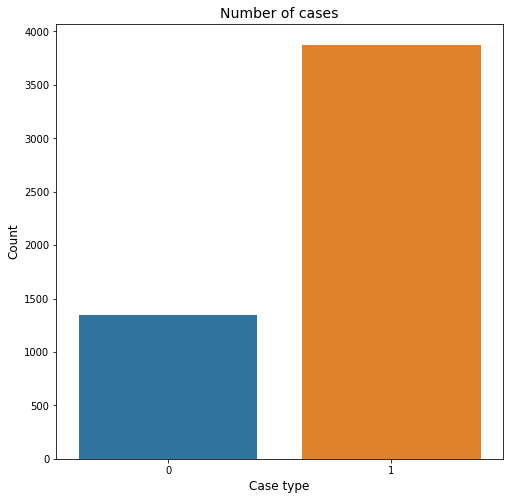

In [44]:
import seaborn as sns
plt.figure(figsize=(8,8))
sns.barplot(x = [0,1] , y = [len(os.listdir('/content/chest_xray/chest_xray/train/NORMAL')) , len(os.listdir('/content/chest_xray/chest_xray/train/PNEUMONIA'))] )
plt.title('Number of cases', fontsize=14)
plt.xlabel('Case type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

<h4 style =' line-height: 2' > tha data is clearly unbalanced so we are not going to use accuracy to judge our model because is is more biased towards the positive class . 

in every machine learning application we have an evaluation matrix wich called confusion matrix , it contains 4 cells : 
    
**FALSE NEGATIVE :** determine number of negative class samples that are misclassified .
    
**FALSE POSITIVE :** determine number of positive class samples that are misclassified .
    
**TRUE NEGATIVE :** determine number of negative class samples that are correctly classified .
    
**TRUE POSITIVE :** determine number of positive class samples that are correctly classified .
    
we use this matrix to evaluate our model according to other metrics than accuracy , we have : 
    
**precision : tp / (tp + fp)**
    
**recall : tp / (tp + fn)**
    
**f1-score : (tp + tn) / ( all samples )**
    
**MCC :** this metric is highly used in biological problems since data are most of the time unballanced  ,The Matthews correlation coefficient , is a more reliable statistical rate which produces a high score only if the prediction obtained good results in all of the four confusion matrix categories , a correlation of: C = 1 indicates perfect agreement, C = 0 is expected for a prediction no better than random, and C = -1 indicates total disagreement between prediction and observation .
we will focus only on those for this notebook .    

    
    
so , the formula of accuracy is : (number_of_correctly_classified_instances / number_of_instances) , this formula may work well in most of problems but what about the case of unbalanced dataset ? 
    
suppose we have 2 classes the former (negative (normal) ) has 100 samples while the latter (positive (abnormal)) have 5 , if our model classified all the samples as negative (normal) we would still have accuracy = 95/100 wich is very high even the weighted accuracy will reamin high  , but in fact all of the abnormal patients are classified as normal which is extreemly misleading .so in medical application , it is more crucial to have a false negative (predicting no desease when having a desease ) then having a false positive (predicting of having a desease when it is not the case )  thats why we use recall :( tp / (tp + fn) ) for evaluation in this problem . (as much as the fn increases the recall will decrease) .

</h4>

<div class = 'h3'>2- visualizing data :</div>

Text(0.5, 1.0, 'Pneumonia')

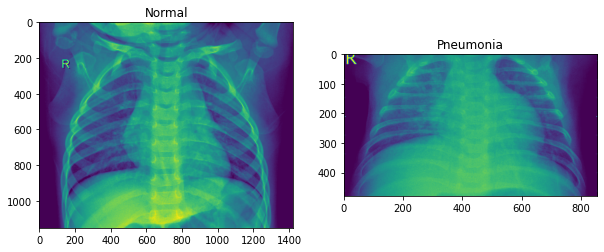

In [45]:
#visualizing the samples 
from PIL import Image #pillow library uses open instead of imread 
#pillow is the fastest compared to other libraries in reading images
norm_load = Image.open('/content/chest_xray/chest_xray/train/NORMAL/IM-0117-0001.jpeg')
pneumonia_load = Image.open('/content/chest_xray/chest_xray/train/PNEUMONIA/person1004_virus_1686.jpeg')

#Let's plt these images
fig = plt.figure(figsize = (10,8))
a1 = fig.add_subplot(1,2,1)
img_plot = plt.imshow(norm_load)
a1.set_title('Normal')

a2 = fig.add_subplot(1, 2, 2)
img_plot = plt.imshow(pneumonia_load)
a2.set_title('Pneumonia')

<h4 style =' line-height: 2' > As we can see that it is very difficult or almost impossible for non-experts to determine whether a patient is diagnosed with pneumonia or not, which is why a new field of deep learning has emerged that is called CNN (Convolutional Neural Network).</h4>

<div class = 'h2'> What is CNN </div>

<h4 style =' line-height: 2'>
- A convolutional neural network (CNN) is a type of artificial neural network used in image recognition and processing that is specifically designed to process pixel data.<br>
- The layers of a CNN consist of an input layer, an output layer and a hidden layer that includes multiple convolutional layers, pooling layers, fully connected layers and normalization layers.<br>
- the advantage of CNN compared to its predecessors is that it automatically detects the important features without any human supervision and reduces overfitting due to the ability of generalization (weight sharing) ,plus it is translation invariant , (it doesn't matter where or how your object is situated or transformed , it will always recognize it ) .

note : the convolution layer offer the translation equivariance and the pooling layer improve it to translation invariance . </h4>




In [46]:
#https://towardsdatascience.com/understanding-and-calculating-the-number-of-parameters-in-convolution-neural-networks-cnns-fc88790d530d

<h4 style =' line-height: 2'>
The aim of convolution and pooling operations is to shrink the input data into a more smaller one , to reduce weights from a side and diminue the computational power needed to execute such a complex network from the other side .
let me explain it more in details 

**the convolution step :**

as you can se in the image above the selected area in the first cube is called a receptive field we will apply our filter ( second cube ) to this receptive field by calculating the sum of weights between the two matrices then we will store the result in a new matrix ( third cube ) called feature map .
the important thing is that the filter will remain the same among all the input entries , that's what leads us to translation equivariance i.e it doesn't matter the order in wich you applied your convolution .

each filter is used to extract a feature so the number of filters define the number of features for our sample .

so if we have an input of dimensions (A x A x K) where (A = high shape, A = width shape , K = channels number ) , and filter of dimensions ( B x B x 1 ) the output will be of shape ( O , O , 1)  .
in case of many filters they will be stored under eatch other resulting a 3d matrix of dimensions(B x B x K) by consequence the output will be ( O , O , k)

this filters have many hyperametres : 
1. the shape : the high and width .
2. the stride : it by how much the window (the filter figure) will shift among the input .
...
**the pooling step :**
thsi one is mainly used for dimentionality reduction , it will reduce the size of the conv layer output matrix without loosing so much informations and provides translation invariance (no matter were the object is situated in the input the class will remain the same )  it has two hyperparameters : the shape and the type of pooling (max pooling / av pooling ...) , and it has no parameteres .

</h4>

<div class = 'h3'>3- building the model :</div>

In [47]:
from keras.layers import LeakyReLU
from keras.layers import BatchNormalization
from tensorflow.keras.optimizers import SGD
from keras.layers import Dense, Dropout, Flatten, ZeroPadding2D, Conv2D, MaxPool2D , SeparableConv2D

model = Sequential()
model.add( SeparableConv2D(8 , (3,3)  , padding = 'same' , activation = 'relu' , input_shape = (100,100,3)))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , padding = 'same'))
model.add( SeparableConv2D(32 , (5,5)  , padding = 'same' , activation = 'relu' , input_shape = (100,100,3)))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , padding = 'same'))
model.add( SeparableConv2D(64 , (3,3)  , padding = 'same' , activation = 'relu'))
# model.add(DropBlock2D(0.1, block_size=7))
model.add(Dropout(0.7))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2, padding = 'same'))
model.add(Conv2D(64 , (3,3), padding = 'valid' , activation = 'relu'))
model.add(Conv2D(128 , (3,3), padding = 'valid' , activation = 'relu'))
model.add(Dropout(0.7))
model.add(BatchNormalization())
model.add(MaxPool2D((3,3) , strides = 1 , padding = 'same'))


model.add(Flatten())

model.add(Dense(units = 100 , activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 50 , activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(units = 20 , activation = 'relu'))
model.add(Dropout(0.1))

model.add(Dense(units = 1 , activation = 'sigmoid'))
# opt = SGD(learning_rate = 0.001 , momentum = 0.2 , decay = 0.1)
model.compile(optimizer = 'ADAM' , loss = 'binary_crossentropy' , metrics = ['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 separable_conv2d_3 (Separab  (None, 100, 100, 8)      59        
 leConv2D)                                                       
                                                                 
 batch_normalization_4 (Batc  (None, 100, 100, 8)      32        
 hNormalization)                                                 
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 50, 50, 8)        0         
 2D)                                                             
                                                                 
 separable_conv2d_4 (Separab  (None, 50, 50, 32)       488       
 leConv2D)                                                       
                                                                 
 batch_normalization_5 (Batc  (None, 50, 50, 32)      

<h4>
-The proba of the Dropout layer is a hyper-parameter (regularizer) to help us find the optimum bias-variance spot. 
It is done by removing certain connections every iteration therefore the hidden units cannot depend a lot on any particular feature. </h4>

In [48]:
from keras.callbacks import EarlyStopping
#learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience = 2, verbose=1,factor=0.3, min_lr=0.01)

callback = EarlyStopping(monitor='val_loss', patience = 5 , restore_best_weights = True)

In [49]:
# history = model.fit(train_datagen.flow(x_train,y_train, batch_size = 32) ,
#                     epochs = 20 , validation_data = test_datagen.flow(x_val, y_val) 
#                     ,callbacks = [learning_rate_reduction])

In [50]:
#Steps_per_epoch = no. of training images/ batch_size   
#validation_steps= no. of testing images/ batch_size    

<div class = 'h3'>4- Data generation :</div>

In [51]:
train_datagen = ImageDataGenerator(
                                shear_range = 0.1,
                                   zoom_range = 0.2, 
                                   samplewise_std_normalization = False,  #divide each datas to own std
                                   zca_whitening = False,  #dimension reduction
                                   rotation_range = 0.5,    #rotate 5 degree
                                   fill_mode='nearest', #to fill the empty pixels after rotation
                                    
                                   width_shift_range = 0.2, #shift 5%
                                   height_shift_range = 0.3,
                                     #randomly flip images
                                   vertical_flip = False)

test_datagen = ImageDataGenerator()  #Image normalization.

training_set = train_datagen.flow(x_train , y_train , batch_size = 1000)

validation_generator = test_datagen.flow(x_val , y_val, batch_size = 50)

test_set = test_datagen.flow(x_test , y_test,batch_size = 50 )

In [52]:
624/40

15.6

<div class = 'h3'>5- model training :</div>

In [53]:
cnn_model = model.fit(x_train , y_train,
                        epochs = 35,
                        validation_data = validation_generator , 
                        callbacks=[callback])

Epoch 1/35
163/163 [==============================] - 64s 383ms/step - loss: 0.5036 - accuracy: 0.7958 - val_loss: 2.7689 - val_accuracy: 0.6250
Epoch 2/35
163/163 [==============================] - 63s 387ms/step - loss: 0.2838 - accuracy: 0.8834 - val_loss: 2.5315 - val_accuracy: 0.6250
Epoch 3/35
163/163 [==============================] - 62s 380ms/step - loss: 0.2265 - accuracy: 0.9095 - val_loss: 1.5205 - val_accuracy: 0.6250
Epoch 4/35
163/163 [==============================] - 61s 377ms/step - loss: 0.1856 - accuracy: 0.9220 - val_loss: 0.6645 - val_accuracy: 0.6651
Epoch 5/35
163/163 [==============================] - 62s 379ms/step - loss: 0.1718 - accuracy: 0.9369 - val_loss: 0.5118 - val_accuracy: 0.7404
Epoch 6/35
163/163 [==============================] - 63s 388ms/step - loss: 0.1551 - accuracy: 0.9433 - val_loss: 0.3536 - val_accuracy: 0.8654
Epoch 7/35
163/163 [==============================] - 62s 381ms/step - loss: 0.1549 - accuracy: 0.9482 - val_loss: 0.3570 - val_ac

In [54]:
model.evaluate(test_set)

1/1 [==============================] - 0s 88ms/step - loss: 0.4010 - accuracy: 0.9375


[0.4009661078453064, 0.9375]

In [55]:
#converting sigmoid probabilities into binary 
preds = np.round(model.predict(x_test))

<Figure size 432x288 with 0 Axes>

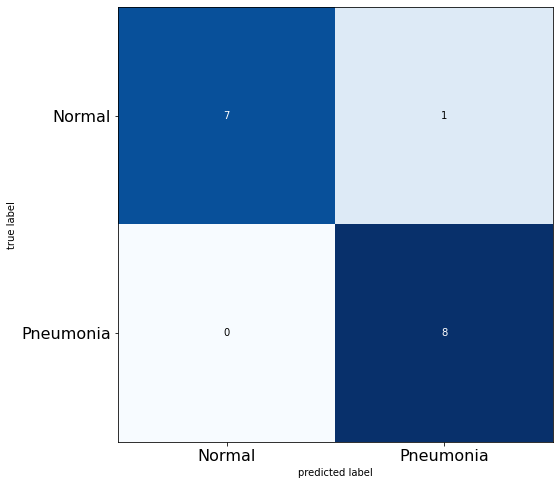

In [56]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
cm  = confusion_matrix(y_test, preds)
plt.figure()
plot_confusion_matrix(cm,figsize=(12,8), hide_ticks=True,cmap=plt.cm.Blues)
plt.xticks(range(2), ['Normal', 'Pneumonia'], fontsize=16)
plt.yticks(range(2), ['Normal', 'Pneumonia'], fontsize=16)
plt.show()

In [57]:
print(classification_report(y_test, preds, target_names = ['Normal (Class 0)','Pneumonia (Class 1)']))

                     precision    recall  f1-score   support

   Normal (Class 0)       1.00      0.88      0.93         8
Pneumonia (Class 1)       0.89      1.00      0.94         8

           accuracy                           0.94        16
          macro avg       0.94      0.94      0.94        16
       weighted avg       0.94      0.94      0.94        16



<h4> so recall of pneumonia is high , wich means that nearly all abnormal patients had been correctly classified  ,  ive focused only on the recall of pneumonia as i think it is the most crucial part .</h4>